## AnglePGAN Analysis

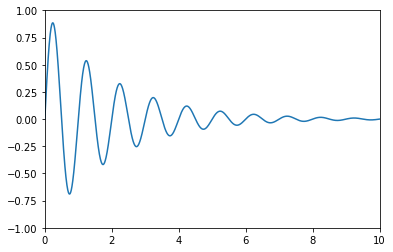

In [440]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


if __name__ == '__main__':
  x = np.arange(0, 10, 0.005)
  y = np.exp(-x/2.) * np.sin(2*np.pi*x)

  fig, ax = plt.subplots()
  ax.plot(x, y)
  ax.set_xlim(0, 10)
  ax.set_ylim(-1, 1)

  plt.show()

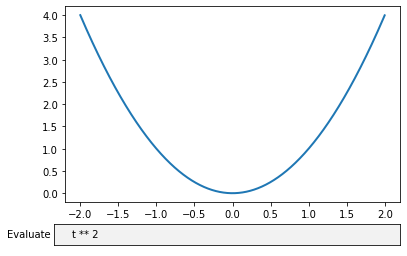

In [441]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import TextBox
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)
t = np.arange(-2.0, 2.0, 0.001)
s = t ** 2
initial_text = "t ** 2"
l, = plt.plot(t, s, lw=2)


def submit(text):
    ydata = eval(text)
    l.set_ydata(ydata)
    ax.set_ylim(np.min(ydata), np.max(ydata))
    plt.draw()

axbox = plt.axes([0.1, 0.05, 0.8, 0.075])
text_box = TextBox(axbox, 'Evaluate', initial=initial_text)
text_box.on_submit(submit)

plt.show()


In [442]:
import os
import sys
import numpy as np
import h5py
#import cv2 

f = h5py.File('./Desktop/cern/data.h5','r')                    # load data into f variable
img = np.array(f.get('ECAL'))

In [443]:
real_s = np.load('./Desktop/cern/real_data.npy')
fake_s = np.load('./Desktop/cern/generated.npy')

In [444]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D

In [445]:
real = real_s[25]
fake = fake_s[22]

In [446]:
fake[np.isnan(fake)] = 0

In [447]:
fake.shape

(51, 51, 25)

In [448]:
x2 = real[:, 0, 0]
y2 = real[0, :, 0]
z2 = real[0, 0, :]

x3 = fake[:, 0, 0]
y3 = fake[0, :, 0]
z3 = fake[0, 0, :]

print(x2.shape)
print(y2.shape)
print(z2.shape)

(51,)
(51,)
(25,)


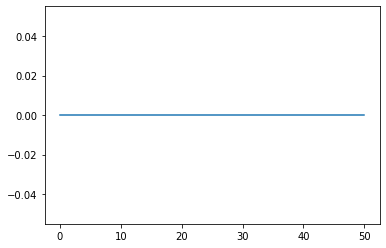

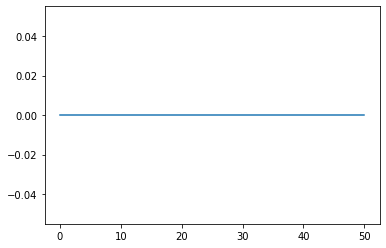

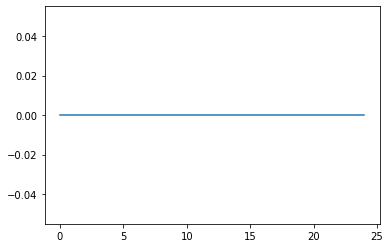

In [449]:
plt.plot(x2)
plt.show()
plt.plot(y2)
plt.show()
plt.plot(z2)
plt.show()

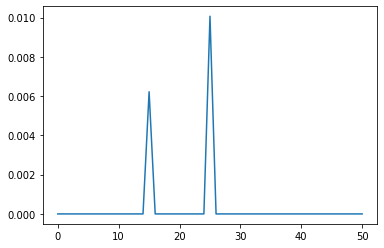

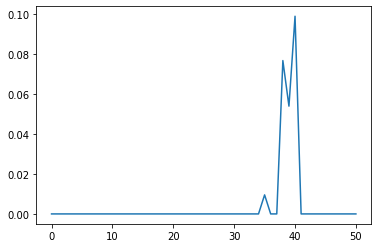

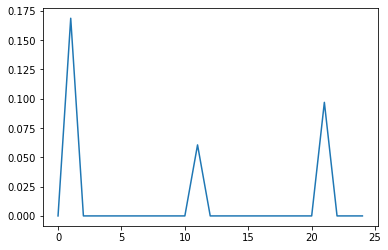

In [450]:
plt.plot(x3)
plt.show()
plt.plot(y3)
plt.show()
plt.plot(z3)
plt.show()

# Real Data

In [463]:
len(real[:,0])

51

In [465]:
real[:,0].shape

(51, 25)

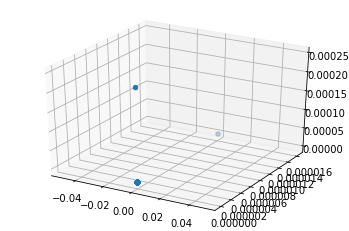

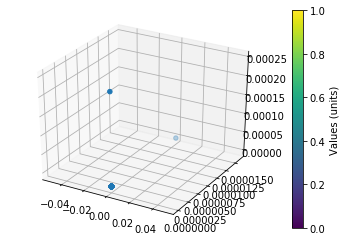

In [468]:
import numpy as np

x2=real[:,0]
y2=real[:,1]
z2=real[:,2]
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x2,y2,z2)
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
pnt3d=ax.scatter(x2,y2,z2)
cbar=plt.colorbar(pnt3d)
cbar.set_label("Values (units)")
plt.show()

# Fake Data

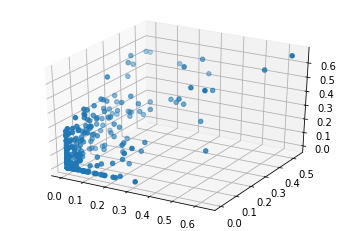

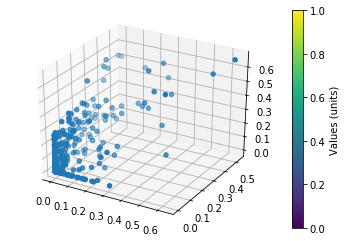

In [469]:
import numpy as np

x3=fake[:,0]
y3=fake[:,1]
z3=fake[:,2]
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x3,y3,z3)
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
pnt3d=ax.scatter(x3,y3,z3)
cbar=plt.colorbar(pnt3d)
cbar.set_label("Values (units)")
plt.show()

In [375]:
from PIL import Image
pic = Image.fromarray(test*255)
pic.show()

In [339]:
test = real[:,:,0]
test.shape

test2 = fake[:,:,0]
test2.shape

(51, 51)

# Normalization

In [377]:
# example of pixel normalization
from numpy import asarray
from PIL import Image
# load image
image = Image.open('./Desktop/chat.jpg')
pixels = asarray(image)
# confirm pixel range is 0-255
print('Data Type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
# convert from integers to floats
pixels = pixels.astype('float32')
# normalize to the range 0-1
pixels /= 255.0
# confirm the normalization
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Data Type: uint8
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000


In [433]:
# example of global pixel standardization
from numpy import asarray
from PIL import Image
# load image
image = real_s
pixels = asarray(image)
# convert from integers to floats
pixels = pixels.astype('float32')
# calculate global mean and standard deviation
mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
# global standardization of pixels
pixels = (pixels - mean) / std
# confirm it had the desired effect
mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))

Mean: 0.000, Standard Deviation: 0.001
Mean: -0.000, Standard Deviation: 1.000


In [432]:
pixels.std()

1.0000002

In [394]:
x4 = pixels[:, 0, 0]
y4 = pixels[0, :, 0]
z4 = pixels[0, 0, :]

print(x4.shape)
print(y4.shape)
print(z4.shape)

(51,)
(51,)
(25,)


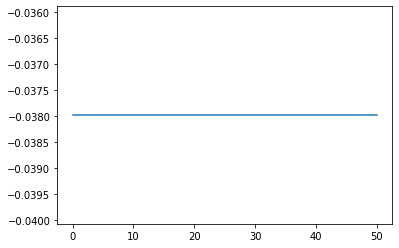

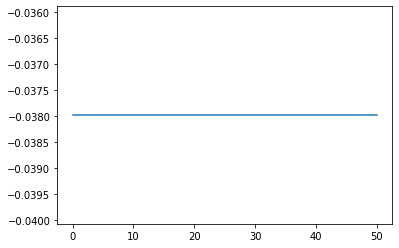

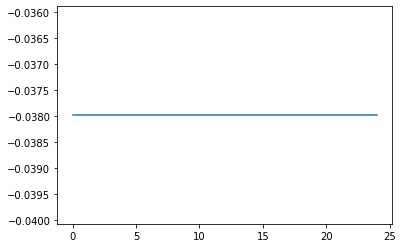

In [395]:
plt.plot(x4)
plt.show()
plt.plot(y4)
plt.show()
plt.plot(z4)
plt.show()

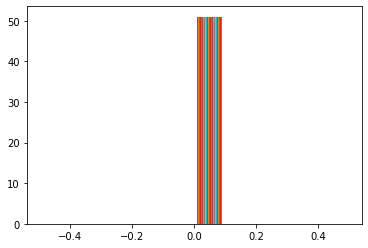

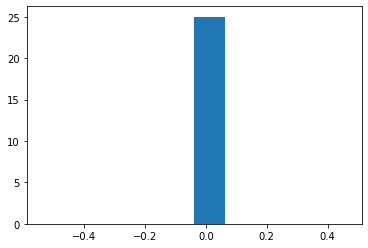

In [424]:
plt.hist(y2)
plt.show()

plt.hist(y4)
plt.show()

In [420]:
pixels.mean()

0.0